# Baseball Case Study

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: 

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

# Importing necessary Libraries

In [108]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df=pd.read_csv('Baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Dataset contains only numeric values, no categorical problem so it is a "Regression" problem. 'W' contains number of wins predicted, which is the target variable in the datset.

# EDA

In [3]:
df.shape

(30, 17)

Dataset consists of 30 rows and 17 columns.

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.sample(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96


In [6]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns in the dataset are integer data, except ERA which is float data.

In [8]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

All the above values are number of unique values present in each column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Checking Null values

In [10]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum().sum()

0

<AxesSubplot:>

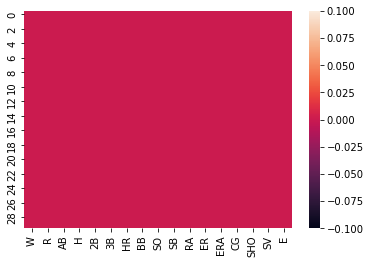

In [12]:
sns.heatmap(df.isnull())

There is no null values present in the dataset.

In [13]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

These are all the columns present in the dataset.

In [14]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

These are the value counts of target variable.

In [15]:
# Checking empty space.

df.loc[df['W']==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


There is no empty space in dataset.

# Summary Statistics

In [16]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


The count is same in all the columns so there are no null values.

There is high difference in max and 75th percentile.

The mean is more than median in AB, H, HR, SV and E columns, means these values are right skewed.

The median is more than mean in R, 2B, BB, SO, RA, ER, ERA and SHO columns, mean these columns are left skewed.

# Data Visualization

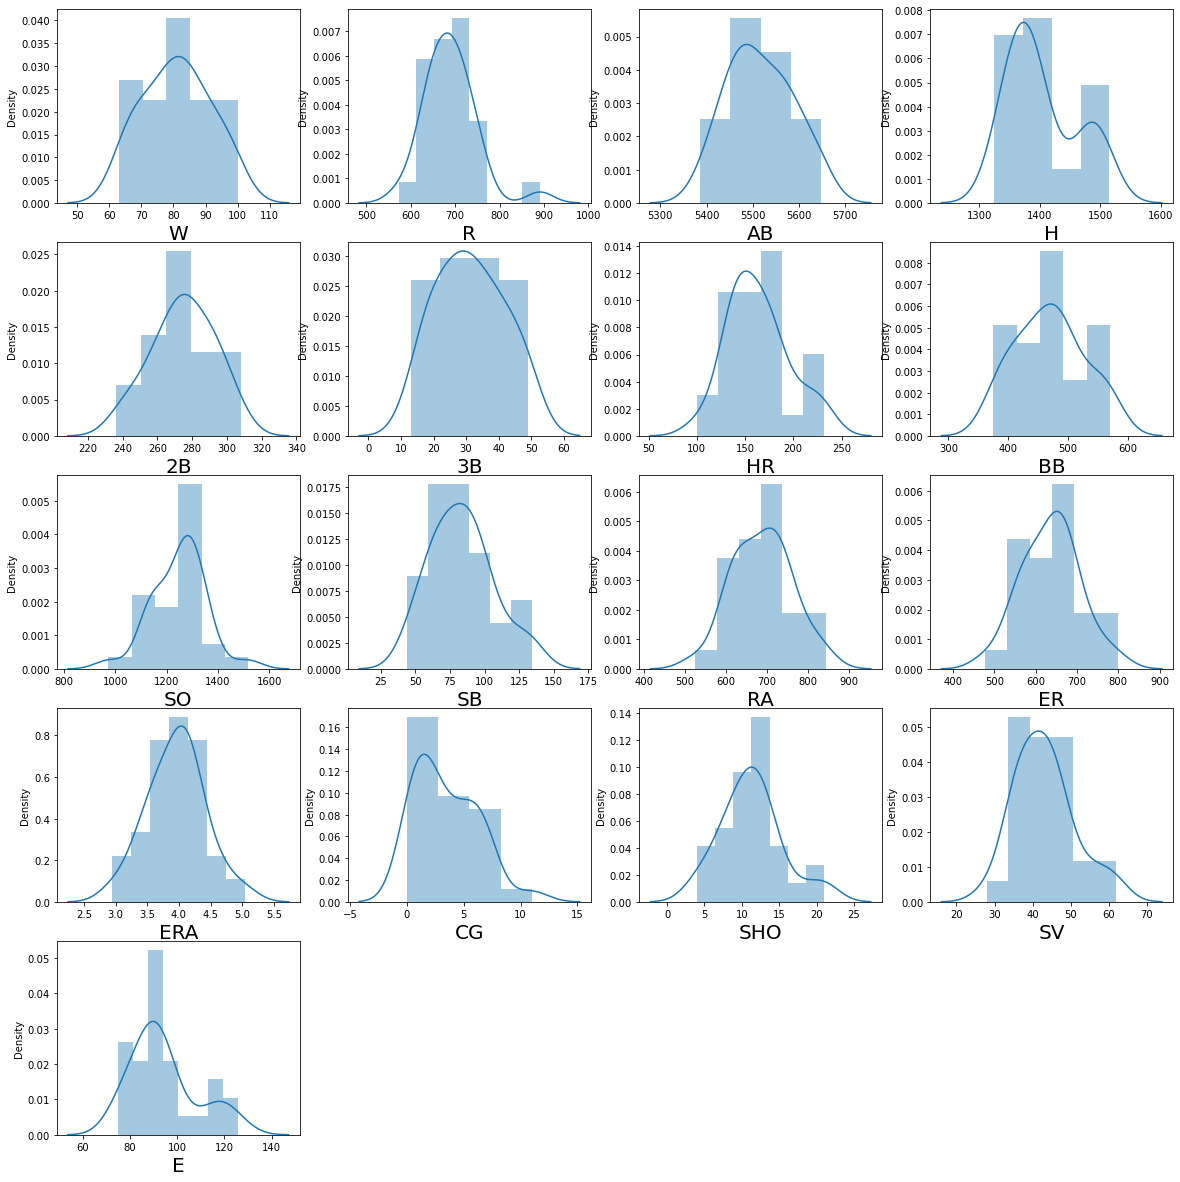

In [18]:
plt.figure(figsize=(20,25), facecolor='White')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Almost all the columns are bell shapes means normally distributed, except R, SO, CG and E.

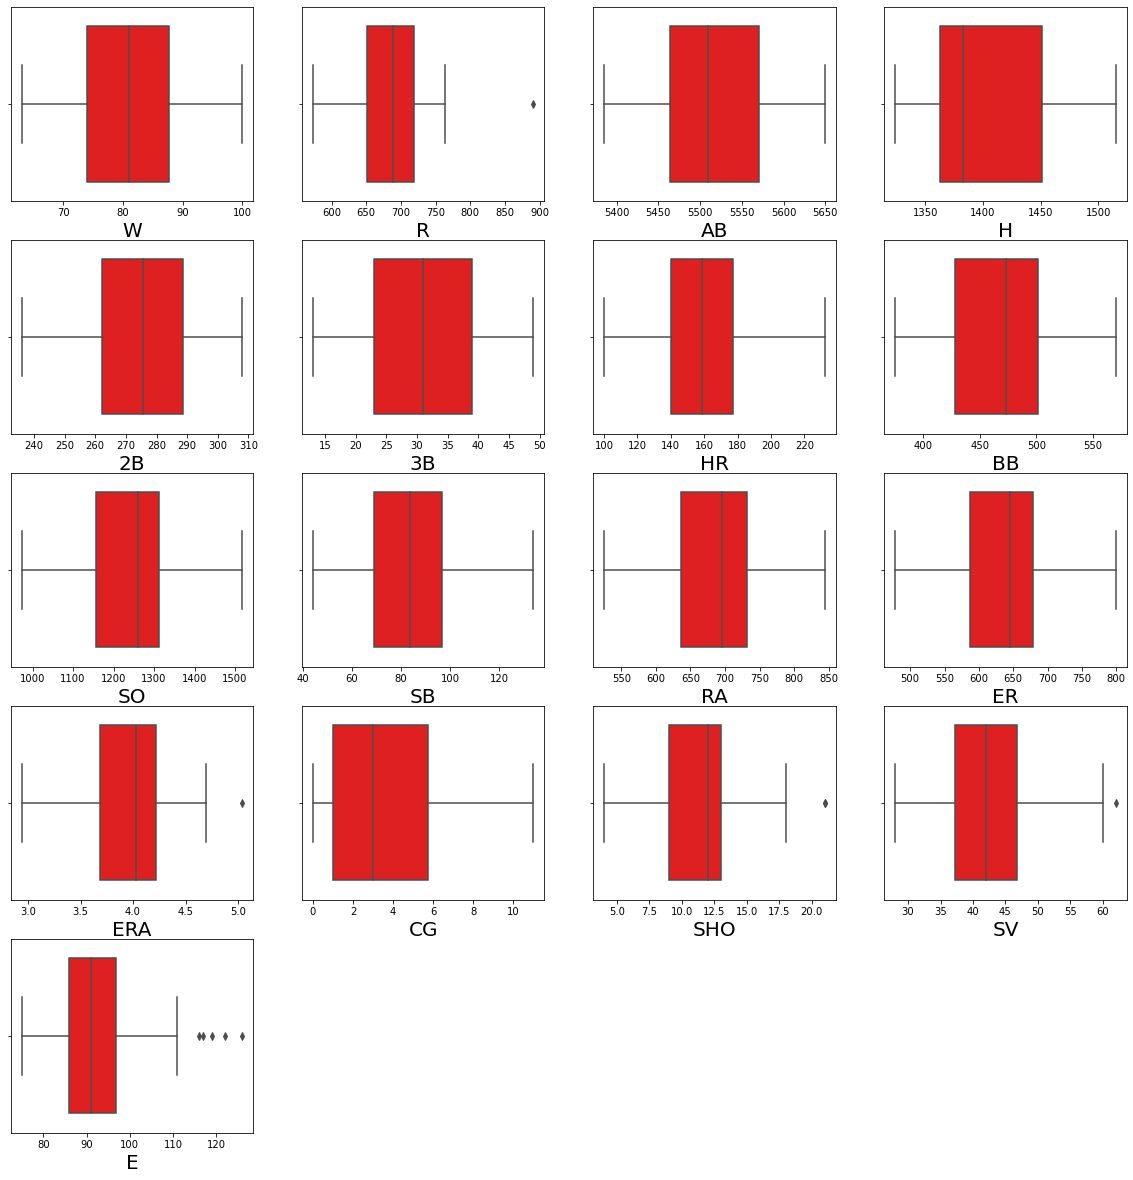

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column], color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above observations of box plot, outliers are present in R, ERA, SHO, SV and E columns.

Bivariate Analysis

Text(0, 0.5, 'Wins')

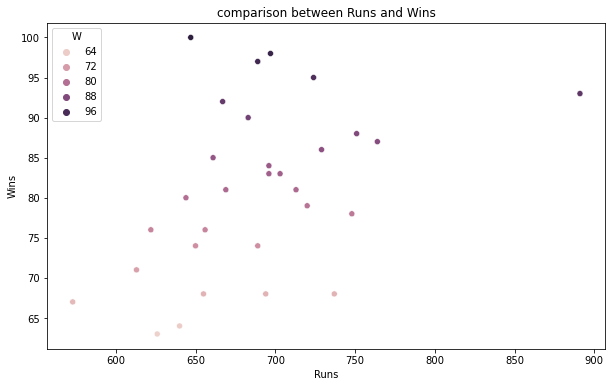

In [20]:
plt.figure(figsize=[10,6])
plt.title('comparison between Runs and Wins')
sns.scatterplot(df['R'], df['W'], hue=df['W'])
plt.xlabel("Runs")
plt.ylabel("Wins")

If runs increasing, Wins also increasing.

Text(0, 0.5, 'Runs')

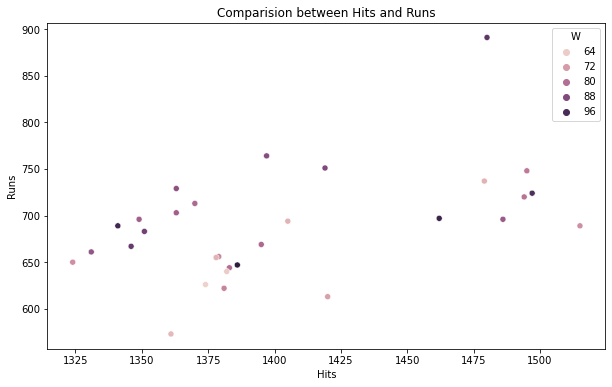

In [21]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Hits and Runs')
sns.scatterplot(df['H'],df['R'],hue=df["W"])
plt.xlabel("Hits")
plt.ylabel("Runs")

Text(0, 0.5, 'Hits')

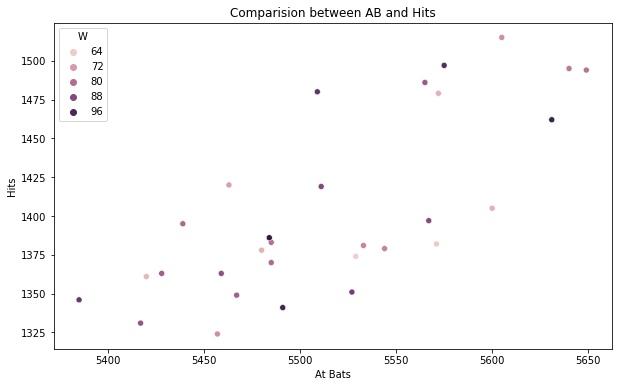

In [22]:
plt.figure(figsize=[10,6])
plt.title('Comparision between AB and Hits')
sns.scatterplot(df['AB'],df['H'],hue=df['W'])
plt.xlabel("At Bats")
plt.ylabel("Hits")

Text(0, 0.5, 'Wins')

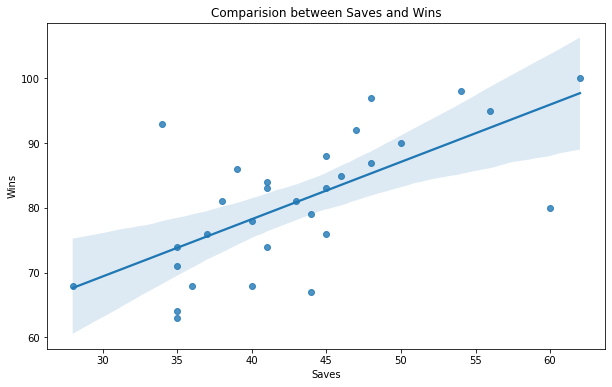

In [23]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Saves and Wins')
sns.regplot(df['SV'],df['W'])
plt.xlabel("Saves")
plt.ylabel("Wins")

Here it is positively linear.

Text(0, 0.5, 'Wins')

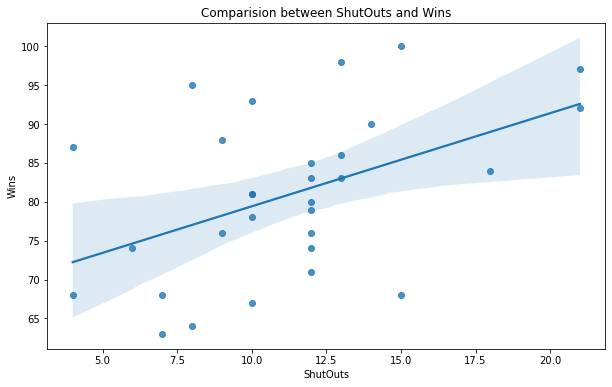

In [24]:
plt.figure(figsize=[10,6])
plt.title('Comparision between ShutOuts and Wins')
sns.regplot(df['SHO'],df['W'])
plt.xlabel("ShutOuts")
plt.ylabel("Wins")

The shoutouts is more, the winning chances is also more.

Text(0, 0.5, 'Wins')

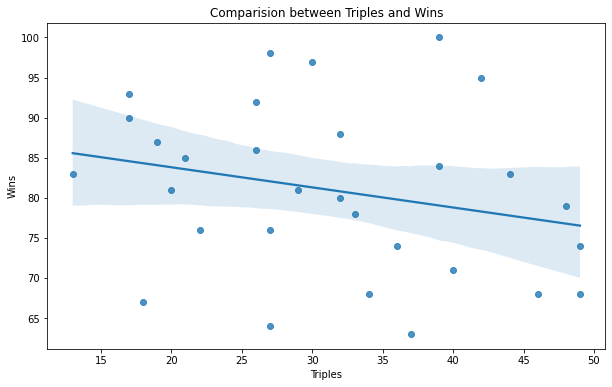

In [25]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Triples and Wins')
sns.regplot(df['3B'],df['W'])
plt.xlabel("Triples")
plt.ylabel("Wins")

Here negative relatonship between the 3B and Wins.

Text(0, 0.5, 'Errors')

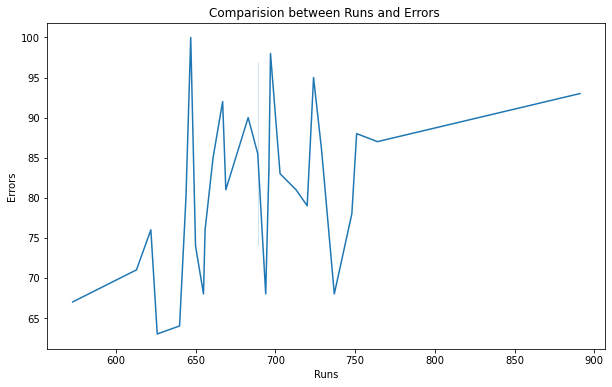

In [26]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Runs and Errors ')
sns.lineplot(df['R'],df['W']) 
plt.xlabel("Runs")
plt.ylabel("Errors")

Most of the runs are between 650-750.

Text(0, 0.5, 'Wins')

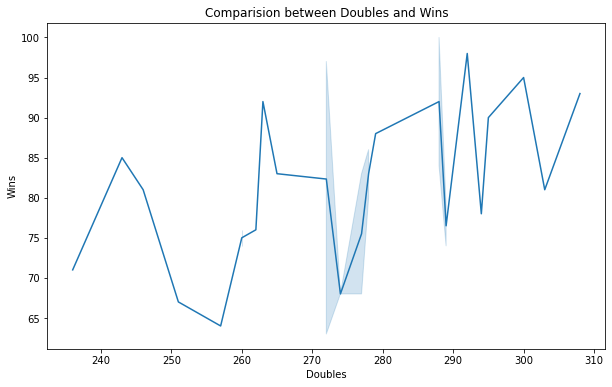

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Doubles and Wins')
sns.lineplot(df['2B'],df['W'])
plt.xlabel("Doubles")
plt.ylabel("Wins")

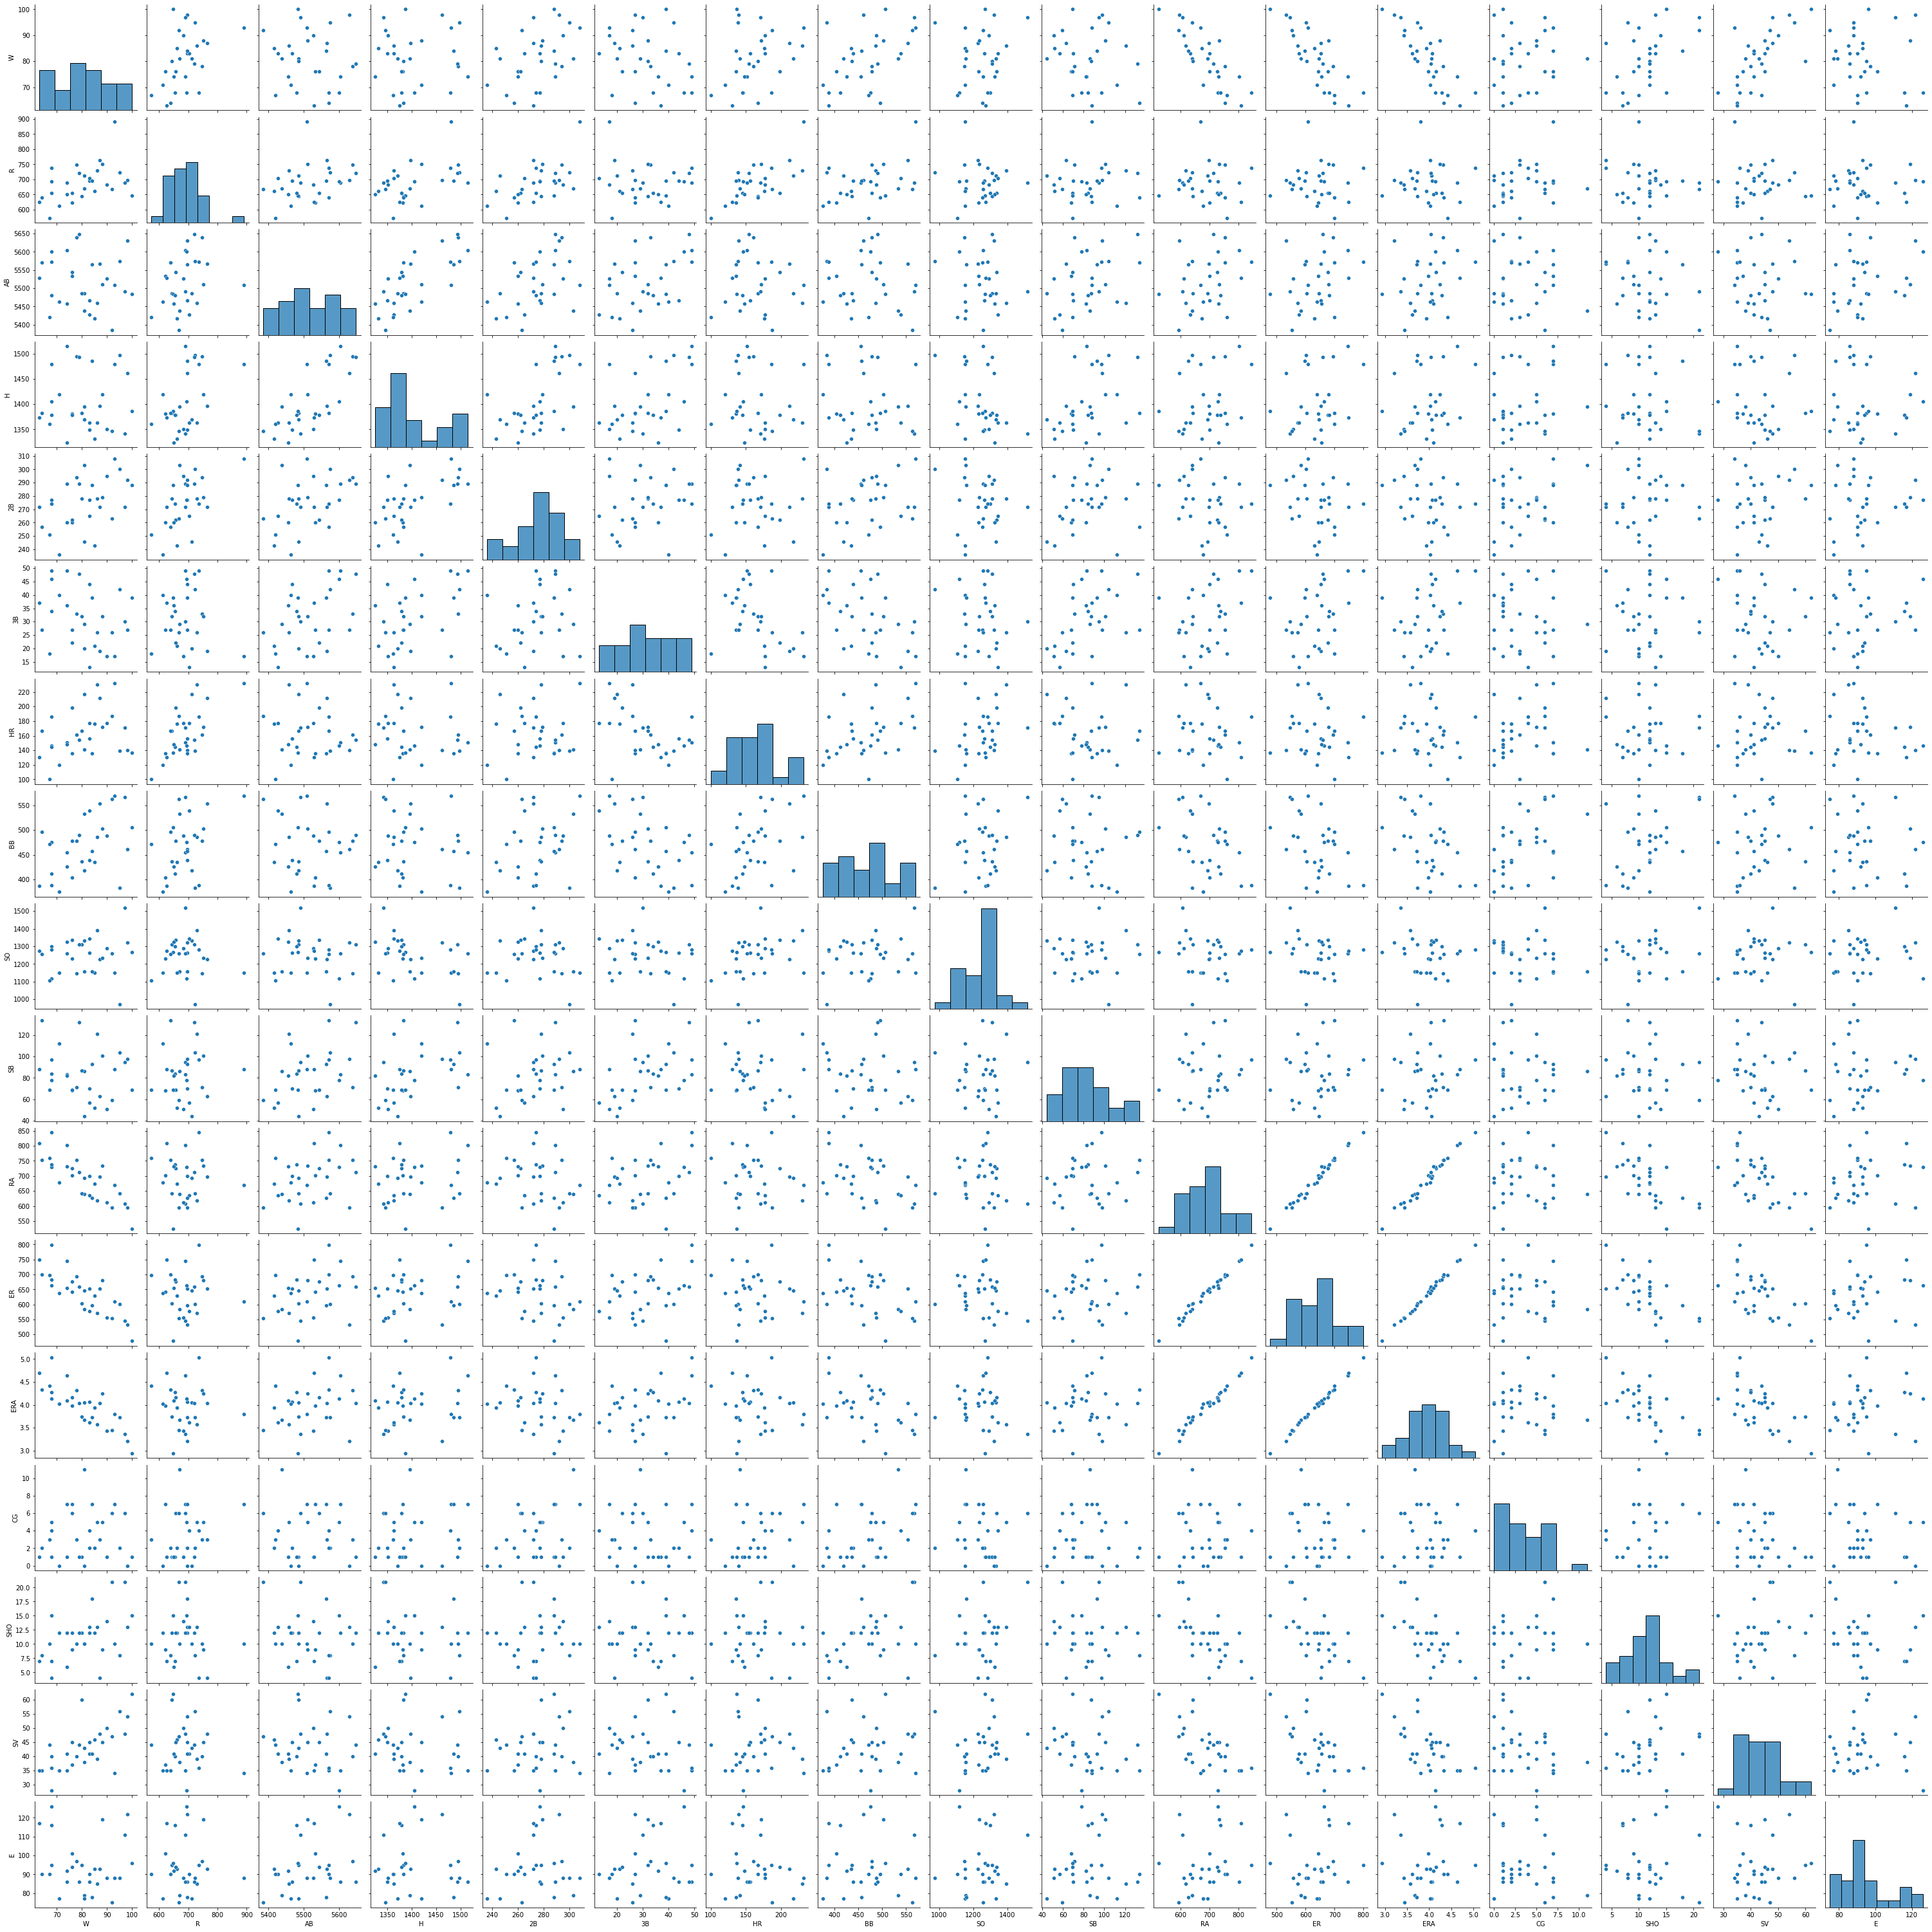

In [28]:
sns.pairplot(df)

# checking Outliers

<AxesSubplot:>

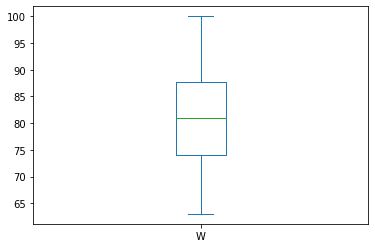

In [29]:
df['W'].plot.box()

No outliers in Wins.

<AxesSubplot:>

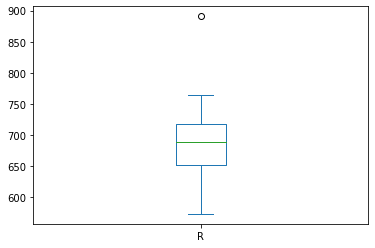

In [30]:
df['R'].plot.box()

Outliers are present.

<AxesSubplot:>

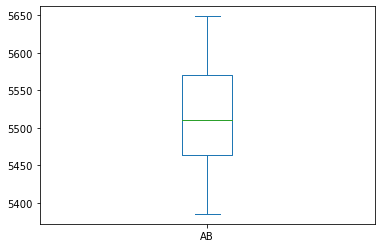

In [31]:
df['AB'].plot.box()

<AxesSubplot:>

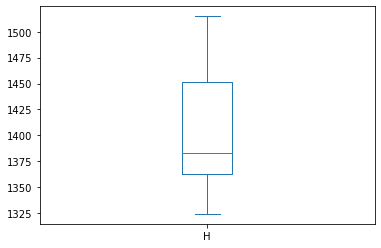

In [32]:
df['H'].plot.box()

<AxesSubplot:>

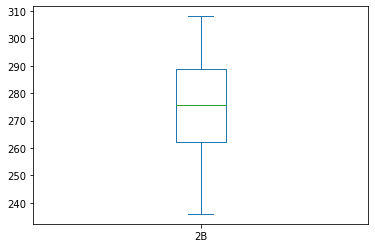

In [33]:
df['2B'].plot.box()

<AxesSubplot:>

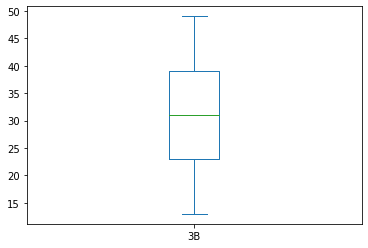

In [34]:
df['3B'].plot.box()

<AxesSubplot:>

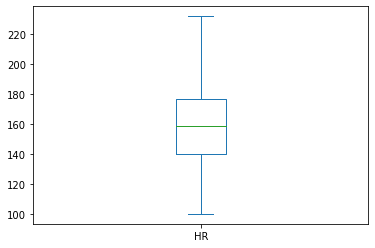

In [35]:
df['HR'].plot.box()

<AxesSubplot:>

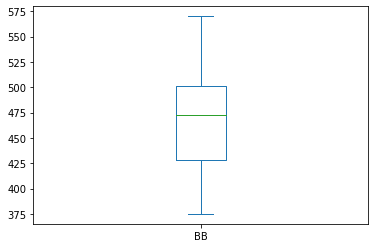

In [36]:
df['BB'].plot.box()

<AxesSubplot:>

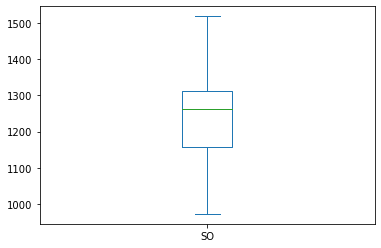

In [37]:
df['SO'].plot.box()

<AxesSubplot:>

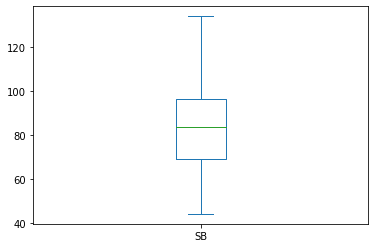

In [38]:
df['SB'].plot.box()

<AxesSubplot:>

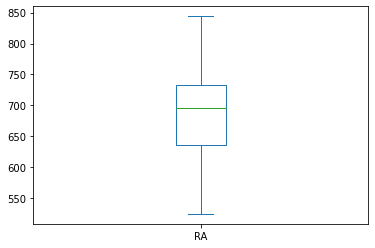

In [39]:
df['RA'].plot.box()

<AxesSubplot:>

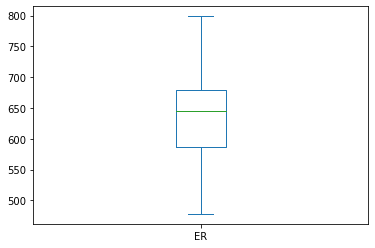

In [40]:
df['ER'].plot.box()

<AxesSubplot:>

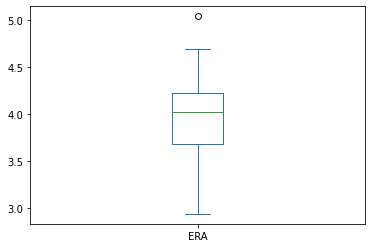

In [41]:
df['ERA'].plot.box()

Outliers are present in ERA.

<AxesSubplot:>

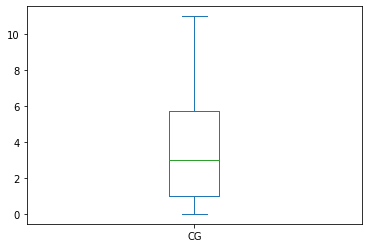

In [42]:
df['CG'].plot.box()

<AxesSubplot:>

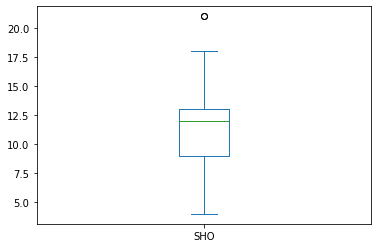

In [43]:
df['SHO'].plot.box()

Outliers are present in SHO.

<AxesSubplot:>

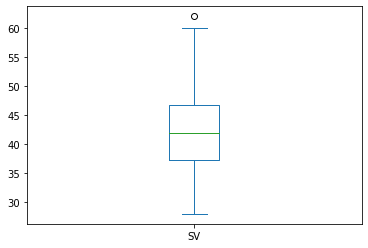

In [44]:
df['SV'].plot.box()

Outliers are present in SV.

<AxesSubplot:>

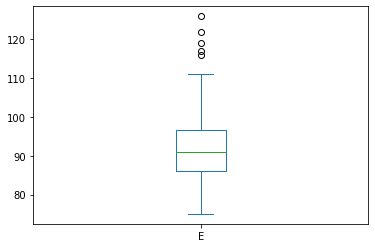

In [45]:
df['E'].plot.box()

More outliers are present in E.

# Removing Outliers

In [46]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [47]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (29, 17)


In [48]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [49]:
df.shape

(29, 17)

After removing outliers dataset contains 29 rows and 17 columns.

In [50]:
# checking data loss after removing outliers.

dataloss=(30-29)/30*100
dataloss

3.3333333333333335

# Skewness

In [51]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [52]:
import numpy as np

df['H']=np.sqrt(df['H'])
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [53]:
df['SV']=np.sqrt(df['SV'])
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.370280
E      0.840271
dtype: float64

In [54]:
df['CG']=np.sqrt(df['CG'])
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.370280
E      0.840271
dtype: float64

In [66]:
df['E']=np.sqrt(df['E'])
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.370280
E      0.584359
dtype: float64

# Correlation

In [63]:
corr=df.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.019562,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,-0.003340,0.497526,0.754886,-0.075017
R,0.390451,1.000000,0.438022,0.432903,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.141559,-0.085108,0.071589,0.041195
AB,-0.085780,0.438022,1.000000,0.769684,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.064516,-0.198872,-0.127766,0.321857
H,-0.019562,0.432903,0.769684,1.000000,0.527700,0.580906,-0.218968,-0.222036,-0.372596,0.419058,0.244127,0.280268,0.256176,0.053891,-0.136605,-0.090078,-0.014995
2B,0.384886,0.469293,0.490752,0.527700,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.256132,0.084060,0.258675,0.146992
3B,-0.206737,0.134204,0.445604,0.580906,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,0.009499,-0.058896,-0.236230,0.098511
HR,0.245697,0.586894,-0.064653,-0.218968,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.103823,0.005546,0.084263,-0.182355
BB,0.447513,0.258450,-0.137850,-0.222036,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.446861,0.473922,0.197177,-0.052382
SO,0.156469,0.081158,-0.111243,-0.372596,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.065802,0.231230,0.105667,0.152608
SB,-0.169503,0.075323,0.373674,0.419058,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.038446,-0.104602,-0.187605,0.078001


<AxesSubplot:>

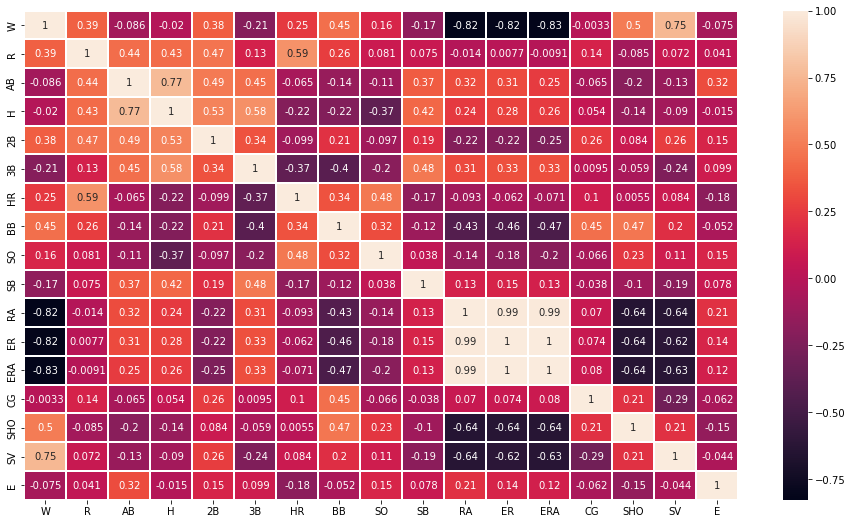

In [65]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,annot=True)

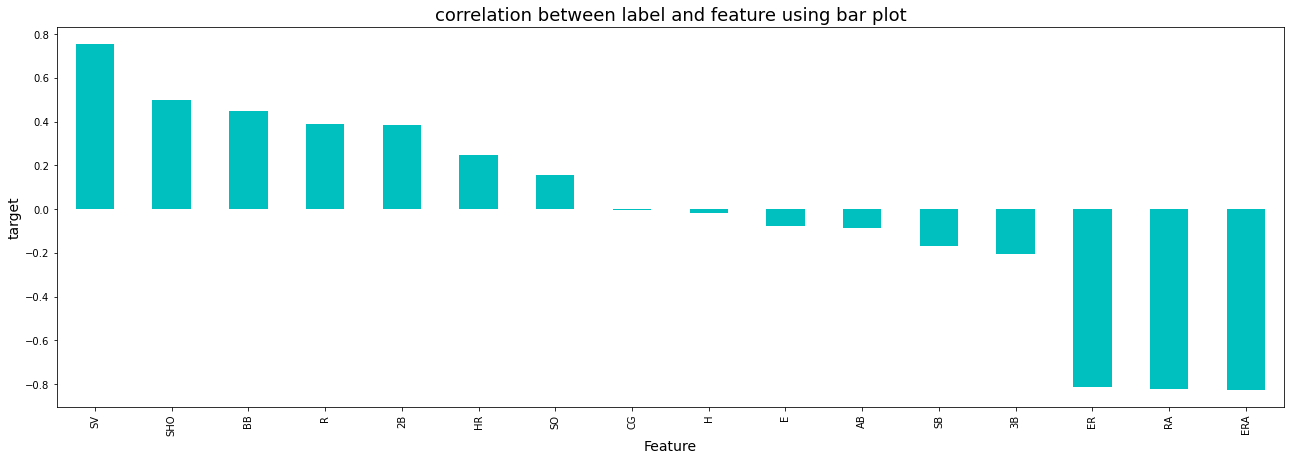

In [67]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Here 'H' and 'CG' column has very less correlation with the target variable 'W', so we can drop them.

In [68]:
df.drop("H", axis=1, inplace=True)

In [69]:
df.drop("CG", axis=1, inplace=True)

In [70]:
df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,7.483315,1.017643
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,6.708204,1.017552
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,6.164414,1.017215
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,6.082763,1.018191
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,5.916080,1.017552
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,6.928203,1.017863
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,6.557439,1.017113
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,7.745967,1.017948
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,6.324555,1.018031
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,6.708204,1.018844


In [71]:
df.shape

(29, 15)

After removing very less correlating values, dataset contains 29 rows and 15 columns.

# Splitting the dataset

In [72]:
x=df.drop("W", axis=1)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,8,7.483315,1.017643
1,696,5467,277,44,156,439,1264,70,700,653,4.07,12,6.708204,1.017552
2,669,5439,303,29,141,533,1157,86,640,584,3.67,10,6.164414,1.017215
3,622,5533,260,27,136,404,1231,68,701,643,3.98,9,6.082763,1.018191
4,689,5605,289,49,151,455,1259,83,803,746,4.64,12,5.916080,1.017552
6,764,5567,272,19,212,554,1227,63,698,652,4.03,4,6.928203,1.017863
7,713,5485,246,20,217,418,1331,44,693,646,4.05,10,6.557439,1.017113
8,644,5485,278,32,167,436,1310,87,642,604,3.74,12,7.745967,1.017948
9,748,5640,294,33,161,478,1148,71,753,694,4.31,10,6.324555,1.018031
10,751,5511,279,32,172,503,1233,101,733,680,4.24,9,6.708204,1.018844


In [73]:
y=df['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [74]:
x.shape

(29, 14)

In [75]:
y.shape

(29,)

# Scaling data using StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.813262,1.602631,-0.435447
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.159299,0.255621,-0.597937
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.326982,-0.689393,-1.197877
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.570122,-0.831290,0.538709
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.159299,-1.120956,-0.597937
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-1.785822,0.637942,-0.044793
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.326982,-0.006384,-1.379039
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.159299,2.059075,0.105641
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.326982,-0.411095,0.252952
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.570122,0.255621,1.698925


# Multicollinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [81]:
vif_calc()

     VIF Factor features
0      5.931946        R
1      9.210196       AB
2      2.707879       2B
3      3.244987       3B
4      6.978614       HR
5      2.889538       BB
6      2.730286       SO
7      1.824513       SB
8    180.148537       RA
9   1620.652205       ER
10  1217.445265      ERA
11     3.393770      SHO
12     3.812320       SV
13     1.673994        E


High values of vif for the columns 'RA', 'ER', 'ERA'. Lets drop RA and ER first.

In [82]:
x.drop("ER", axis=1, inplace=True)

In [ ]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [83]:
vif_calc()

    VIF Factor features
0     4.425954        R
1     3.245436       AB
2     2.638469       2B
3     3.190999       3B
4     4.982078       HR
5     2.802221       BB
6     2.682722       SO
7     1.743532       SB
8   124.355022       RA
9   114.146919      ERA
10    3.254005      SHO
11    2.162931       SV
12    1.671484        E


In [84]:
x.drop("RA", axis=1, inplace=True)

In [85]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [86]:
vif_calc()

    VIF Factor features
0     4.274844        R
1     2.202926       AB
2     2.637299       2B
3     3.179852       3B
4     4.626432       HR
5     2.338524       BB
6     2.014072       SO
7     1.594218       SB
8     4.063946      ERA
9     2.775985      SHO
10    1.994153       SV
11    1.430809        E


Now all the vif values are below 5, means multicollinearity problem is solved.

# Finding best random state

In [88]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9324414989577345  on Random_state  50


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

Train the model

In [90]:
x_train.shape

(23, 12)

In [140]:
y_train.shape

(23,)

In [141]:
x_test.shape

(6, 12)

In [93]:
y_test.shape

(6,)

# Linear Regression

In [94]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.858394055522881
MAE: 2.492239879834102
MSE: 8.999844471212457
RMSE: 2.9999740784234215


The R2 score for Linear Regression is 85.8%.

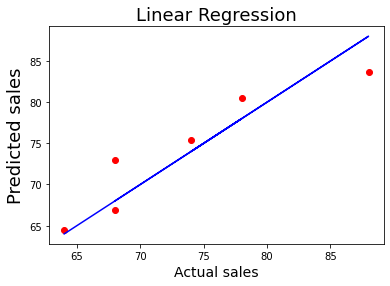

In [98]:
plt.scatter(x=y_test, y=predLR, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# Decision Tree Regressor

In [97]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(y_test, preddtr))
print('MSE:',metrics.mean_squared_error(y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddtr)))

R2_score: -0.8041958041958039
MAE: 9.333333333333334
MSE: 114.66666666666667
RMSE: 10.708252269472673


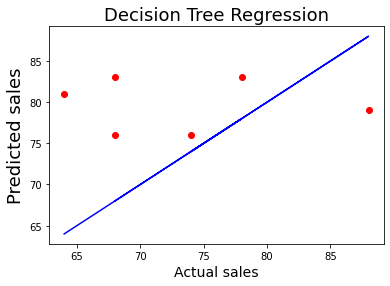

In [99]:
plt.scatter(x=y_test, y=preddtr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Decision Tree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# KNeighbors Regressor

In [100]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
predknr=KNR.predict(x_test)
print('R2_score:',r2_score(y_test,predknr))
print('MAE:',metrics.mean_absolute_error(y_test, predknr))
print('MSE:',metrics.mean_squared_error(y_test, predknr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknr)))

R2_score: 0.4443706293706299
MAE: 4.899999999999999
MSE: 35.313333333333304
RMSE: 5.94250227878234


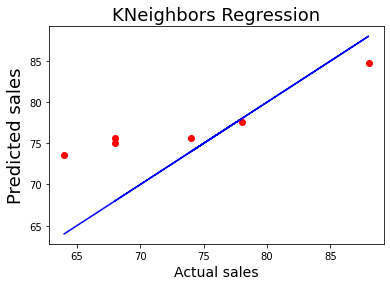

In [101]:
plt.scatter(x=y_test, y=predknr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNeighbors Regression', fontsize=18)
plt.savefig('knr.png')
plt.show()

# Suppport Vector Regressor

In [106]:
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('R2_score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

R2_score: -0.8426606814412216
MAE: 9.768985122240785
MSE: 117.11132330937544
RMSE: 10.821798524708148


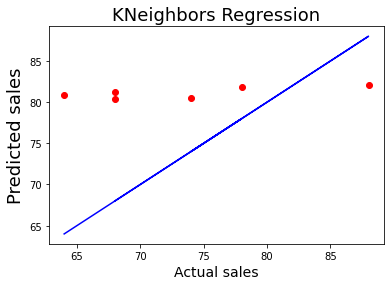

In [107]:
plt.scatter(x=y_test, y=predsvr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNeighbors Regression', fontsize=18)
plt.savefig('svr.png')
plt.show()

# Regularization

# Lasso Regressor

In [109]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [111]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 0.6138277215639099
MAE: 4.087901656346422
MSE: 24.543393696160393
RMSE: 4.9541289543329805


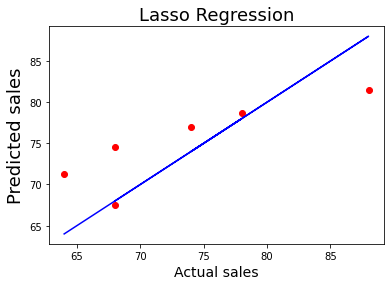

In [113]:
plt.scatter(x=y_test, y=pred_lasso, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Lasso Regression', fontsize=18)
plt.savefig('lasso.png')
plt.show()

# Ridge Regressor

In [133]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [135]:
ridge=Ridge(alpha=10,solver='svd')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.6741998111312959
MAE: 3.901134333326046
MSE: 20.70641200365542
RMSE: 4.550429870205168


# SDG Regressor

In [116]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

R2_Score: 0.8126927385800664
MAE: 2.9328263902711313
MSE: 11.904417059133555
RMSE: 3.4502778234706777


# Checking Cross Validation Score

In [121]:
rfscore=cross_val_score(LR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 12.695949001801281


In [125]:
rfscore=cross_val_score(DTR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: -56.211782926445295


In [127]:
rfscore=cross_val_score(KNR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 12.089725133717133


In [128]:
rfscore=cross_val_score(svr, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: -86.12712042767242


In [130]:
rfscore=cross_val_score(lasso, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 42.845525561739116


In [136]:
rfscore=cross_val_score(ridge, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 51.00591432005175


In [132]:
rfscore=cross_val_score(SGD, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: -84.68607119608305


# Ensemble Technique

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [142]:
rf=RandomForestRegressor(criterion="mae",max_features='auto')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9291232830788312
R2 Score: 21.26536713286715
Cross Val Score: 4.030020566337287


# Saving the best model

In [143]:
import joblib

joblib.dump(ridge,'Baseball.obj')

Baseball_loadmodel=joblib.load('Baseball.obj')
prediction=Baseball_loadmodel.predict(x_test)
prediction

array([69.20337336, 80.61667189, 75.1047929 , 82.42424853, 74.03560942,
       70.87060696])

# Conclusion

In [144]:
conclusion=pd.DataFrame([Baseball_loadmodel.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5
Predicted,69.203373,80.616672,75.104793,82.424249,74.035609,70.870607
Original,74.930000,77.860000,78.630000,78.480000,74.640000,73.800000
